In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [13]:
df=pd.read_csv('Mall_Customers.csv')
df.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [14]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [15]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler=StandardScaler()
features_scaled = scaler.fit_transform(features)

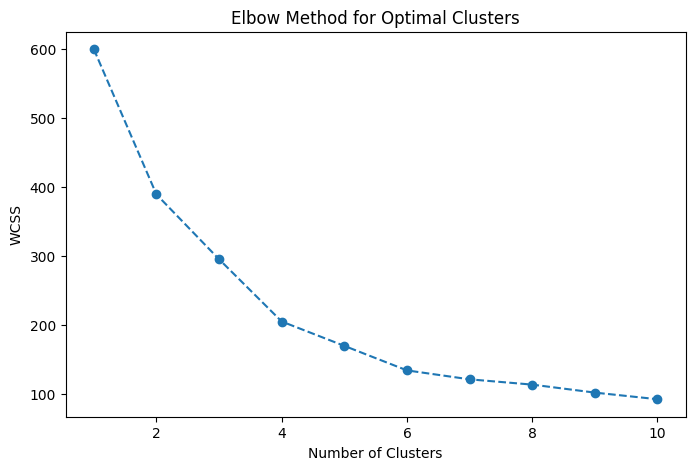

In [16]:
wcss= []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt. xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=0)
df['Cluster']=kmeans.fit_predict(features_scaled)


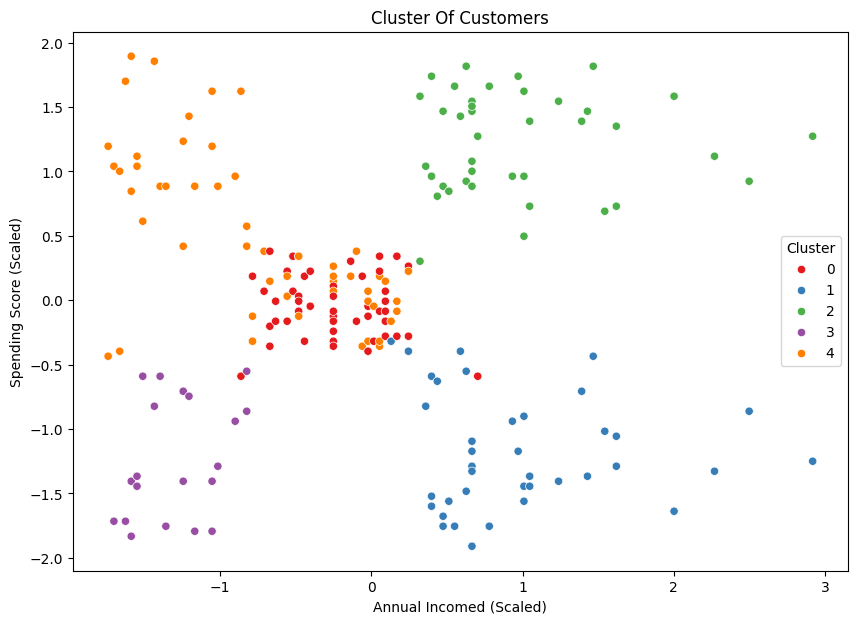

In [26]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=features_scaled[:,1], y=features_scaled[:, 2], hue=df['Cluster'], palette='Set1' )
plt.title('Cluster Of Customers')
plt.xlabel('Annual Incomed (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

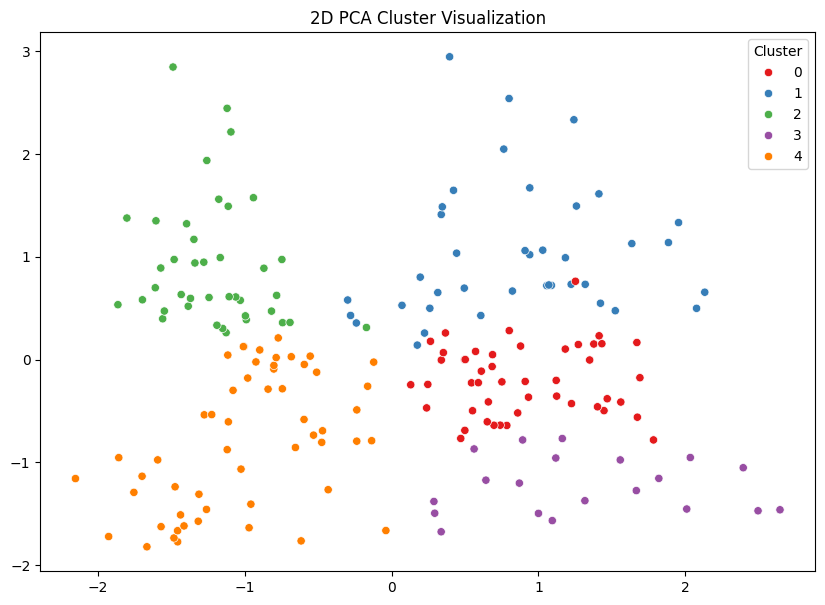

In [27]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

# Plot the clusters in 2D
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_features[:,0], y=pca_features[:,1], hue=df['Cluster'], palette='Set1')
plt.title('2D PCA Cluster Visualization')
plt.show()


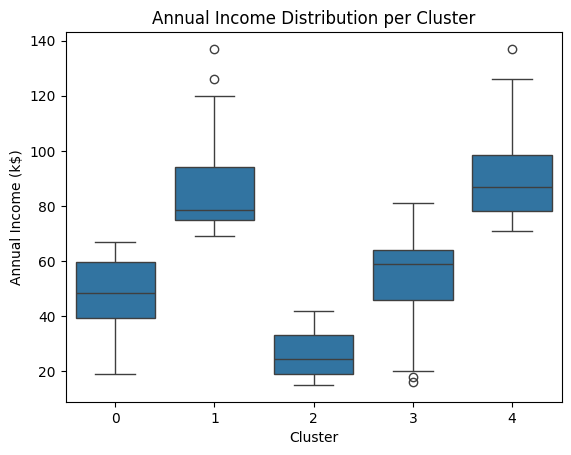

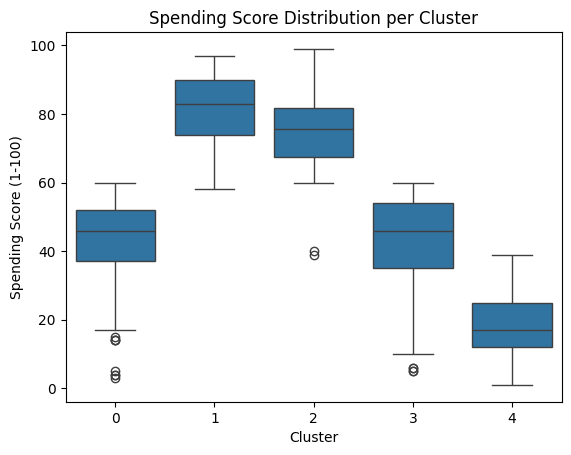

In [20]:
# Plot the distributions of different features across clusters
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution per Cluster')
plt.show()

sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution per Cluster')
plt.show()


In [21]:
score = silhouette_score(features_scaled,df['Cluster'])
print("Silhouette Score: ", score)

Silhouette Score:  0.40846873777345605


In [24]:
st.title("Customer Segmentation Dashboard")
st.write (df.head())
st.bar_chart(df.groupby('Cluster')['CustomerID'].count())

2024-09-27 02:16:09.651 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 02:16:09.914 
  command:

    streamlit run c:\Users\syedz\OneDrive\Desktop\Codes\Customer Clustering\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-27 02:16:09.914 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 02:16:10.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 02:16:10.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 02:16:11.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-27 02:16:11.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()